In [2]:
import os, pdb, json, numpy as np, pandas as pd
import nibabel as nib, matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [3]:
# ln -s /scratch/hw501/data_source/COVID-19/ ./

### Dataset
NHSX Dataset https://nhsx.github.io/covid-chest-imaging-database/project_summaries.html

In [5]:
# Clinical Results of some patients
ctmeta_file = pd.read_excel('COVID-19/NHSX_Clinical_Info_Final.xlsx', header=1)

# Meta Information for the CXR Images, which are used
cxrsmeta_file = pd.read_excel('COVID-19/NHSX_CXR_Listing_Final.xlsx', header=1)

In [10]:
ctmeta_file.head()

,Pseudonym,SwabDate,SubmittingCentre,SwabStatus,PMH CKD,Age,CXR severity,Troponin I,"If CKD, stage",CXR severity 3,Sex,Ferritin,Duration of symptoms,Final COVID Status,Date of ITU admission,COVID CODE,WCC on admission,Current NSAID used,Creatinine on admission,Smoking status,Date of admission,Diastolic BP,1st RT-PCR result,D-dimer on admission,APACHE score on ITU arrival,PMH Lung disease,Current ACEi use,Date last known alive,COVID CODE 2,Date of death,Temperature on admission,FiO2,Lymphocyte count on admission,Date of Positive Covid Swab,Date of result of 2nd RT-PCR,PMH diabetes mellitus type II,Urea on admission,Date of result of 1st RT-PCR,Death,NEWS2 score on arrival,Date of 2nd CXR,Intubation,Fibrinogen if d-dimer not performed,PMH CVS disease,Systolic BP,Platelet count on admission,PMH hypertension,Hospital,Date of 1st CXR,Date of intubation,Date of acquisition of 2nd RT-PCR,Pack year history,Ethnicity,2nd RT-PCR result,ITU admission,PaO2,Date of acquisition of 1st RT-PCR,CRP on admission,Respiratory rate on admission,Current Angiotension receptor blocker use,Heart rate on admission,Troponin T,PMH h1pertension,PMH diabetes mellitus TYPE II,Any supplemental oxygen: FiO2,O2 saturation,PMH diabetes mellitus TYPE I
0,Covid1,NaN,Royal United Hospitals Bath NHS Foundation Trust,NaN,0,47.0,3,NaN,NaN,NaN,1,NaN,NaN,1,NaN,1,7.9,0,84,0.0,2020-11-03 00:00:00,83,0,NaN,NaN,4,0,3/13/20,NaN,NaN,37.5,NaN,1.6,2020-12-03 00:00:00,2020-12-03 00:00:00,0.0,3.3,2020-12-03 00:00:00,0,2,NaN,NaN,NaN,0,126,264,0.0,RUH Bath,2020-11-03 00:00:00,NaN,2020-11-03 00:00:00,NaN,NaN,1,NaN,96.0,2020-11-03 00:00:00,68,18,0,94,NaN,NaN,NaN,NaN,NaN,NaN
1,Covid13,NaN,Royal United Hospitals Bath NHS Foundation Trust,NaN,2,59.0,NaN,NaN,NaN,2,0,NaN,7,NaN,NaN,1,8.4,0,100,0.0,3/24/20,77,1,NaN,NaN,1,1,4/16/20,1,NaN,NaN,NaN,0.9,3/24/20,NaN,2.0,7.9,3/24/20,0,NaN,3/30/20,0,NaN,NaN,126,212,2.0,RUH Bath,3/24/20,NaN,NaN,NaN,NaN,NaN,0,NaN,3/24/20,158,23,0,NaN,23,NaN,NaN,NaN,NaN,NaN
2,Covid14,NaN,Royal United Hospitals Bath NHS Foundation Trust,NaN,2,84.0,NaN,NaN,NaN,NaN,1,NaN,3,NaN,NaN,2,9.1,0,148,3.0,3/24/20,56,1,NaN,NaN,4,1,4/16/20,NaN,NaN,36.7,NaN,0.7,3/24/20,NaN,1.0,8.2,3/24/20,0,3,NaN,0,NaN,NaN,130,180,1.0,RUH Bath,3/24/20,NaN,NaN,NaN,NaN,NaN,0,21.0,3/24/20,22,22,0,50,NaN,NaN,NaN,NaN,NaN,NaN
3,Covid145,NaN,Royal United Hospitals Bath NHS Foundation Trust,NaN,2,96.0,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,3,10.1,0,144,3.0,2020-06-02 00:00:00,71,1,NaN,NaN,6,2,3/23/20,0,2020-06-04 00:00:00,37.8,NaN,1,3/18/20,NaN,0.0,16.4,3/18/20,1,NaN,2/14/20,NaN,NaN,1,135,330,1.0,RUH Bath,2020-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,0,NaN,2020-06-03 00:00:00,41,18,2,96,NaN,NaN,NaN,NaN,NaN,NaN
4,Covid149,NaN,Royal United Hospitals Bath NHS Foundation Trust,NaN,0,82.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,5.2,0,172,3.0,3/24/20,69,1,NaN,NaN,0,1,4/16/20,NaN,NaN,37.4,NaN,0.4,3/24/20,NaN,1.0,12.2,3/24/20,0,NaN,NaN,0,NaN,0,121,125,0.0,RUH Bath,3/24/20,NaN,NaN,NaN,NaN,NaN,0,NaN,3/24/20,37,17,0,117,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cxrsmeta_file.head()

,Covid1,2,Unnamed: 2,Unnamed: 3,1,Covid1.1,6025,Covid1.2,Unnamed: 8,1.1,Covid1.3,6025.1,Covid1.4,20200311,2020-03-11 00:00:00,1.2.826.0.1.3680043.9.3218.1.1.1575273888.1542.1586418238880.4.0,1.2.826.0.1.3680043.9.3218.1.1.1575273888.1542.1586418238880.5.0,1.2.826.0.1.3680043.9.3218.1.1.1575273888.1542.1586418238880.7.0
0,Covid13,8.0,NaN,NaN,1,Covid1,7335.0,Covid1,NaN,1.0,Covid1,7335.0,Covid1,20180910.0,2018-09-10,1.2.826.0.1.3680043.9.3218.1.1.1575273888.1542...,1.2.826.0.1.3680043.9.3218.1.1.1575273888.1542...,1.2.826.0.1.3680043.9.3218.1.1.157527388.1542....
1,Covid14,5.0,NaN,NaN,1,Covid1,NaN,NaN,NaN,2.0,Covid13,73.0,Covid13,20190326.0,2019-03-26,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...
2,Covid145,7.0,NaN,NaN,1,Covid1,NaN,NaN,NaN,2.0,Covid13,2454.0,Covid13,20200117.0,2020-01-17,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...
3,Covid149,3.0,NaN,NaN,1,Covid1,NaN,NaN,NaN,2.0,Covid13,2603.0,Covid13,20170510.0,2017-05-10,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...
4,Covid15,7.0,NaN,NaN,1,Covid1,NaN,NaN,NaN,2.0,Covid13,3787.0,Covid13,20200324.0,2020-03-24,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...,1.2.826.0.1.3680043.9.3218.1.1.1575273.1542.15...


In [12]:
def fetch_ct(nifti_list, patient_id):
    "given a patient id, return all the ct images"
    fetched = []
    for nifti in nifti_list:
        if nifti.split('_')[0] == patient_id: fetched.append(nifti)
    return fetched

In [13]:
patients_wo_clinical = []
patients_w_clinical = []
all_patients = list(set([id.split('_')[0] for id in os.listdir('COVID-19/NHSX/nifti')]))

for patient_id in all_patients:
    if len(ctmeta_file.loc[ctmeta_file['Pseudonym'] == patient_id]) == 0:
        patients_wo_clinical.append(patient_id)
    else:
        patients_w_clinical.append(patient_id)
print('total patients:', len(all_patients),
      ', with clinical records:', len(patients_w_clinical))

total patients: 530 , with clinical records: 304


In [14]:
total = 0
for patient_id in patients_w_clinical:
    total += len(fetch_ct(os.listdir('COVID-19/NHSX/nifti'), patient_id))
print('total ct images:', len(os.listdir('COVID-19/NHSX/nifti')), 
      ', with clinical results:', total)

total ct images: 2780 , with clinical results: 1839


In [22]:
patients_w_clinical

['Covid4024',
 'Covid435',
 'Covid17588',
 'Covid320',
 'Covid8721',
 'Covid3295',
 'Covid4007',
 'Covid4927',
 'Covid7383',
 'Covid3352',
 'Covid3221',
 'Covid400',
 'Covid6157',
 'Covid518',
 'Covid4986',
 'Covid4772',
 'Covid4001',
 'Covid5570',
 'Covid3454',
 'Covid4923',
 'Covid3463',
 'Covid225',
 'Covid4739',
 'Covid3469',
 'Covid4227',
 'Covid3773',
 'Covid4068',
 'Covid17574',
 'Covid216',
 'Covid4237',
 'Covid17349',
 'Covid16581',
 'Covid16966',
 'Covid18',
 'Covid5091',
 'Covid5574',
 'Covid16614',
 'Covid305',
 'Covid3450',
 'Covid4272',
 'Covid3233',
 'Covid326',
 'Covid7178',
 'Covid17527',
 'Covid3455',
 'Covid4842',
 'Covid4316',
 'Covid16967',
 'Covid4005',
 'Covid5139',
 'Covid4220',
 'Covid145',
 'Covid450',
 'Covid3267',
 'Covid4',
 'Covid150',
 'Covid17809',
 'Covid3838',
 'Covid508',
 'Covid17583',
 'Covid7332',
 'Covid4926',
 'Covid5076',
 'Covid4239',
 'Covid3261',
 'Covid17587',
 'Covid3733',
 'Covid4004',
 'Covid149',
 'Covid4019',
 'Covid4135',
 'Covid4634',

In [23]:
fetch_ct(os.listdir('COVID-19/NHSX/nifti'), 'Covid17588')

['Covid17588_20180430_0_0.nii.gz',
 'Covid17588_20180430_2_0.nii.gz',
 'Covid17588_20191016_0_0.nii.gz',
 'Covid17588_20180430_5_0.nii.gz',
 'Covid17588_20191016_1_0.nii.gz',
 'Covid17588_20180430_1_0.nii.gz',
 'Covid17588_20191016_2_0.nii.gz',
 'Covid17588_20200522_1_0.nii.gz',
 'Covid17588_20180430_3_0.nii.gz',
 'Covid17588_20200522_0_0.nii.gz',
 'Covid17588_20180430_4_0.nii.gz']

#### Load CT Images and Correspondent Meta File

In [15]:
patient_id = 'Covid426'
ct_id = 'Covid426_20200406_1_0'

nifti_file = os.path.join('COVID-19', 'NHSX', 'nifti', ct_id + '.nii.gz')
meta_file = os.path.join('COVID-19', 'NHSX', 'json', ct_id + '.json')

ctimg = nib.load(nifti_file)
ctmeta = json.loads(open(meta_file).read())
clinical_meta = ctmeta_file.loc[ctmeta_file['Pseudonym'] == patient_id]

In [16]:
ctmeta

{'SpecificCharacterSet': 'ISO_IR 100',
 'SOPClassUID': '1.2.840.10008.5.1.4.1.1.2',
 'SOPInstanceUID': '1.2.826.0.1.3680043.9.3218.1.1.373437.6991.1588577341781.10320.0',
 'StudyDate': '20200406',
 'SeriesDate': '21120515',
 'AcquisitionDate': '20200406',
 'ContentDate': '21120515',
 'AcquisitionDateTime': '20200406201552.439000',
 'StudyTime': '000000',
 'SeriesTime': '000000',
 'AcquisitionTime': '201552.439000',
 'ContentTime': '000000',
 'AccessionNumber': 'Data anonymised',
 'Modality': 'CT',
 'Manufacturer': 'SIEMENS',
 'InstitutionName': 'Royal United Hospital',
 'InstitutionAddress': 'Data anonymised',
 'ReferringPhysiciansName': 'Data anonymised^^^^',
 'StationName': 'Data anonymised',
 'StudyDescription': 'CT Thorax',
 'SeriesDescription': 'Thorax  1.0  I26f  2',
 'Physician(s)ofRecord': 'Data anonymised^^^^',
 'ManufacturersModelName': 'SOMATOM Definition Edge',
 'IrradiationEventUID': '1.2.826.0.1.3680043.9.3218.1.1.373437.6991.1588577341781.10229.0',
 'PrivateCreator': '0'

In [20]:
ctmeta['StudyDescription']

'CT Thorax'

In [17]:
ctimg.shape

(512, 512, 346)

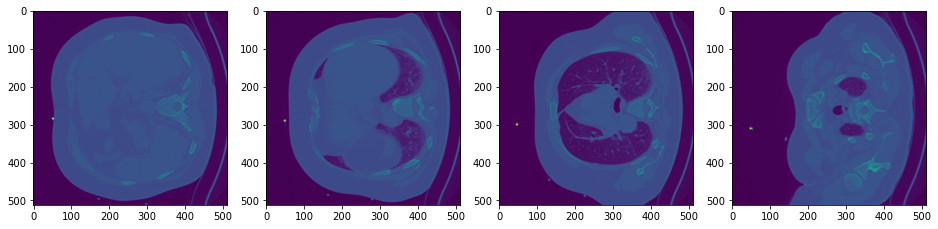

In [21]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(ctimg.get_fdata()[:,:,1])

plt.subplot(142)
plt.imshow(ctimg.get_fdata()[:,:,100])

plt.subplot(143)
plt.imshow(ctimg.get_fdata()[:,:,200])

plt.subplot(144)
plt.imshow(ctimg.get_fdata()[:,:,300])

#### CT Image with Contrast

In [45]:
patient_id = 'Covid17588'
ct_id = 'Covid17588_20200522_1_0'

nifti_file = os.path.join('COVID-19', 'NHSX', 'nifti', ct_id + '.nii.gz')
meta_file = os.path.join('COVID-19', 'NHSX', 'json', ct_id + '.json')

ctimg = nib.load(nifti_file)
ctmeta = json.loads(open(meta_file).read())
clinical_meta = ctmeta_file.loc[ctmeta_file['Pseudonym'] == patient_id]

In [47]:
ctmeta['StudyDescription']

'CT Angiogram pulmonary'

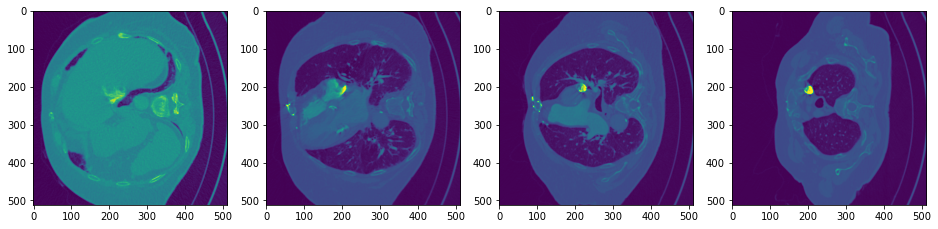

In [48]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(ctimg.get_fdata()[:,:,50])

plt.subplot(142)
plt.imshow(ctimg.get_fdata()[:,:,100])

plt.subplot(143)
plt.imshow(ctimg.get_fdata()[:,:,150])

plt.subplot(144)
plt.imshow(ctimg.get_fdata()[:,:,200])

#### Understanding CT Metas

In [50]:
ct_num, ct_info = [], []
# for patient in patients:
for patient in patients_w_clinical:
    nifti_file, meta_file = [], []
    for file in os.listdir('COVID-19/NHSX/nifti'): 
        if patient in file : 
            nifti_file.append(file) 
    for file in os.listdir('COVID-19/NHSX/json'): 
        if patient in file : 
            meta_file.append(file)
            meta = json.loads(open('COVID-19/NHSX/json/'+ file).read())
            ct_info.append(meta['StudyDescription'].lower())
    if not len(nifti_file) == len(meta_file):
        print(patient)
    ct_num.append(len(nifti_file))

Covid5570


In [51]:
all_ct_info = list(set(ct_info))
all_ct_info

['ct abdomen/pelvis with contrast',
 'ct neck and thorax',
 'ct chest abdomen and pelvis',
 'ct angio aortic aand carotid both',
 'ct angiogram pulmonary abdomen pelvis a',
 'ct cardiac angiogram coronary',
 'ct chest/abdo/pelvis/ with contrast',
 'ct head',
 'ct trauma series, ct thorax abdomen pelvis with contrast, ct spi',
 'ct chest',
 'ct chest/abdo',
 'ct neck thorax abdomen pelvis with cont',
 'ct cardiac cor artery calcium scoring',
 'ct thorax abdomen and pelvis',
 'ct chest/abdo/pelvis with contrast',
 'ct chest/abdo/pelv with contrast',
 'ct neck and thorax with contrast',
 'ct neck thorax abdomen and pelvis',
 'ct chest/abdo/pelvis',
 'ct angiogram pulmonary',
 'ct abdomen and pelvis with contrast',
 'ct aorta whole',
 'ct angiogram pulmonary (ctpa)',
 'ct chest high resolution',
 'ct thorax with contrast',
 'ct chest/abdo with contrast',
 'ct thorax abdomen pelvis with contrast',
 'ct angiogram aorta',
 'ct chest with contrast',
 'ct angiogram abdomen',
 'ct angiogram intr

In [14]:
def ct_valid(info):
    info = info.lower()
    if 'cont' in info or 'car' in info or 'angio' in info or 'head' in info:
        return False
    return True

In [52]:
def contrast_or_not(info):
    info = info.lower()
    if 'cont' in info or 'angio' in info:
        return True
    return False

In [53]:
some_list = []
for info in all_ct_info:
#     some_list.append(ct_valid(info))  
    some_list.append(contrast_or_not(info))

In [54]:
somedf = pd.DataFrame([])
somedf['ct info'] = all_ct_info
somedf['contrast or not'] = some_list
somedf

,ct info,contrast or not
0,ct abdomen/pelvis with contrast,True
1,ct neck and thorax,False
2,ct chest abdomen and pelvis,False
3,ct angio aortic aand carotid both,True
4,ct angiogram pulmonary abdomen pelvis a,True
5,ct cardiac angiogram coronary,True
6,ct chest/abdo/pelvis/ with contrast,True
7,ct head,False
8,"ct trauma series, ct thorax abdomen pelvis wit...",True
9,ct chest,False


### Information of Interest:
#### CT Meta
    1. AcquisitionDate
    2. StudyDescription
    3. PatientsBirthDate
    # 4. PatientID
    5. SlideID
    # use from the clinical results
    # 6. PatientsSex
    # 7. PatientsAge
    8. BodyPartExamined
    9. RotationDirection
    10. FilterType
    11. SmallestImagePixelValue
    12. LargestImagePixelValue
    13. RescaleIntercept
    14. RescaleSlope
    15. NumberOfSlices
#### Clinical Meta
    1. SubmittingCentre (Hospital)
    2. Age
    3. Sex
    4. Final COVID Status	
    5. COVID CODE
    6. Smoking status
    7. Date of admission
    # 8. Date of 1st CXR
    # 8. Date of 2nd CXR
    9. Date of acquisition of 1st RT-PCR
    9. Date of acquisition of 2nd RT-PCR
    11. 1st RT-PCR result
    10. 2nd RT-PCR result
    11. Respiratory rate on admission
    12. Heart rate on admission

In [17]:
# Create a dataframe for all ct images meta info with clinical information
clinical_meta.T

,488
Pseudonym,Covid426
SwabDate,NaN
SubmittingCentre,Royal United Hospitals Bath NHS Foundation Trust
SwabStatus,NaN
PMH CKD,0
Age,67
CXR severity,NaN
Troponin I,NaN
"If CKD, stage",NaN
CXR severity 3,NaN


In [55]:
# Pseudonym
# SlideID

ct_meta_ioi = [
    'AcquisitionDate', 
    'StudyDescription', 
#     'BodyPartExamined', 
#     'RotationDirection', 
    'FilterType', 
#     'SmallestImagePixelValue', 
#     'LargestImagePixelValue', 
    'RescaleIntercept',
    'RescaleSlope', 
    'NumberOfSlices']
clinical_meta_ioi = [
    'SubmittingCentre', 
    'Age', 
    'Sex', 
    'Final COVID Status', 
    'COVID CODE', 
    'Smoking status', 
    'Date of admission', 
    'Date of acquisition of 1st RT-PCR', 
    'Date of acquisition of 2nd RT-PCR', 
    '1st RT-PCR result', 
    '2nd RT-PCR result', 
    'Respiratory rate on admission', 
    'Heart rate on admission']

In [119]:
all_meta = pd.DataFrame(
    [], columns=['Pseudonym'] + ['SlideID'] + ct_meta_ioi + clinical_meta_ioi)

nifti_ls = os.listdir('COVID-19/NHSX/nifti')
nifti_ls.sort()

for ct_id in nifti_ls:
    patient_id = ct_id.split('_')[0]
    # pdb.set_trace()
    if patient_id in patients_wo_clinical:
        continue
    new_dict = dict()
    new_dict['Pseudonym'] = patient_id
    new_dict['SlideID'] = ct_id
    meta_file = os.path.join('COVID-19', 'NHSX', 'json', ct_id.replace('.nii.gz', '') + '.json')
    # nifti_file = os.path.join('NHSX', 'nifti', ct_id + '.nii.gz')
    # ctimg = nib.load(nifti_file)
    try:
        ctmeta = json.loads(open(meta_file).read())
        # pdb.set_trace()
    except FileNotFoundError:
        print(ct_id)
        pdb.set_trace()
        continue
    clinical_meta = ctmeta_file.loc[ctmeta_file['Pseudonym'] == patient_id]
    
    # pdb.set_trace()
    new_dict['Contrast'] = contrast_or_not(ctmeta['StudyDescription'])
    for attr in ct_meta_ioi:
        new_dict[attr] = ctmeta[attr]
    for attr in clinical_meta_ioi:
        new_dict[attr] = clinical_meta[attr].values[0]
    
    all_meta = all_meta.append(new_dict, ignore_index=True)

Covid5570_20200426_4_0.nii.gz
> <ipython-input-119-10e3a9261bd5>(24)<module>()
     22         print(ct_id)
     23         pdb.set_trace()
---> 24         continue
     25     clinical_meta = ctmeta_file.loc[ctmeta_file['Pseudonym'] == patient_id]
     26 

ipdb> c


In [70]:
all_meta

,Pseudonym,SlideID,AcquisitionDate,StudyDescription,FilterType,RescaleIntercept,RescaleSlope,NumberOfSlices,SubmittingCentre,Age,Sex,Final COVID Status,COVID CODE,Smoking status,Date of admission,Date of acquisition of 1st RT-PCR,Date of acquisition of 2nd RT-PCR,1st RT-PCR result,2nd RT-PCR result,Respiratory rate on admission,Heart rate on admission,Contrast
0,Covid145,Covid145_20200302_0_0.nii.gz,20200302,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,139,Royal United Hospitals Bath NHS Foundation Trust,96.0,1,1,3,3.0,2020-06-02 00:00:00,2020-06-03 00:00:00,NaN,1,NaN,18,96,1.0
1,Covid145,Covid145_20200302_1_0.nii.gz,20200302,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,445,Royal United Hospitals Bath NHS Foundation Trust,96.0,1,1,3,3.0,2020-06-02 00:00:00,2020-06-03 00:00:00,NaN,1,NaN,18,96,1.0
2,Covid145,Covid145_20200302_2_0.nii.gz,20200302,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,555,Royal United Hospitals Bath NHS Foundation Trust,96.0,1,1,3,3.0,2020-06-02 00:00:00,2020-06-03 00:00:00,NaN,1,NaN,18,96,1.0
3,Covid145,Covid145_20200302_3_0.nii.gz,20200302,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,445,Royal United Hospitals Bath NHS Foundation Trust,96.0,1,1,3,3.0,2020-06-02 00:00:00,2020-06-03 00:00:00,NaN,1,NaN,18,96,1.0
4,Covid146,Covid146_20180329_0_0.nii.gz,20180329,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,340,Royal United Hospitals Bath NHS Foundation Trust,88.0,1,1,0,1.0,1/24/20,3/18/20,NaN,1,NaN,18,77,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,Covid7600,Covid7600_20200428_3_0.nii.gz,20200428,CT Angiogram Pulmonary,WEDGE_3,-1024.0,1.0,13,Hampshire Hospitals NHS Foundation Trust,50.0,1,0,1,3.0,4/20/20,4/20/20,2020-02-05 00:00:00,1,0.0,42,100,1.0
1834,Covid8721,Covid8721_20200416_0_0.nii.gz,20200416,CT Angiogram pulmonary,FLAT,-1024.0,1.0,460,Betsi Cadwaladr University Health Board,44.0,0,1,2,0.0,2020-08-04 00:00:00,2020-08-04 00:00:00,NaN,1,NaN,NaN,NaN,1.0
1835,Covid8721,Covid8721_20200416_1_0.nii.gz,20200416,CT Angiogram pulmonary,FLAT,-1024.0,1.0,329,Betsi Cadwaladr University Health Board,44.0,0,1,2,0.0,2020-08-04 00:00:00,2020-08-04 00:00:00,NaN,1,NaN,NaN,NaN,1.0
1836,Covid8721,Covid8721_20200416_2_0.nii.gz,20200416,CT Angiogram pulmonary,FLAT,-1024.0,1.0,230,Betsi Cadwaladr University Health Board,44.0,0,1,2,0.0,2020-08-04 00:00:00,2020-08-04 00:00:00,NaN,1,NaN,NaN,NaN,1.0


In [72]:
len(all_meta)

1838

In [120]:
all_meta.to_csv("COVID-19/cam_clinical_all.csv", index=False)

In [123]:
pd.read_csv('COVID-19/cam_clinical_all.csv')

,Pseudonym,SlideID,AcquisitionDate,StudyDescription,FilterType,RescaleIntercept,RescaleSlope,NumberOfSlices,SubmittingCentre,Age,Sex,Final COVID Status,COVID CODE,Smoking status,Date of admission,Date of acquisition of 1st RT-PCR,Date of acquisition of 2nd RT-PCR,1st RT-PCR result,2nd RT-PCR result,Respiratory rate on admission,Heart rate on admission,Contrast
0,Covid145,Covid145_20200302_0_0.nii.gz,20200302,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,139,Royal United Hospitals Bath NHS Foundation Trust,96.0,1,1,3.0,3.0,2020-06-02 00:00:00,2020-06-03 00:00:00,NaN,1,NaN,18.0,96.0,1.0
1,Covid145,Covid145_20200302_1_0.nii.gz,20200302,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,445,Royal United Hospitals Bath NHS Foundation Trust,96.0,1,1,3.0,3.0,2020-06-02 00:00:00,2020-06-03 00:00:00,NaN,1,NaN,18.0,96.0,1.0
2,Covid145,Covid145_20200302_2_0.nii.gz,20200302,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,555,Royal United Hospitals Bath NHS Foundation Trust,96.0,1,1,3.0,3.0,2020-06-02 00:00:00,2020-06-03 00:00:00,NaN,1,NaN,18.0,96.0,1.0
3,Covid145,Covid145_20200302_3_0.nii.gz,20200302,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,445,Royal United Hospitals Bath NHS Foundation Trust,96.0,1,1,3.0,3.0,2020-06-02 00:00:00,2020-06-03 00:00:00,NaN,1,NaN,18.0,96.0,1.0
4,Covid146,Covid146_20180329_0_0.nii.gz,20180329,CT Chest/Abdo/Pelvis/ With Contrast,FLAT,-1024.0,1.0,340,Royal United Hospitals Bath NHS Foundation Trust,88.0,1,1,0.0,1.0,1/24/20,3/18/20,NaN,1,NaN,18.0,77.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Covid7600,Covid7600_20200428_3_0.nii.gz,20200428,CT Angiogram Pulmonary,WEDGE_3,-1024.0,1.0,13,Hampshire Hospitals NHS Foundation Trust,50.0,1,0,1.0,3.0,4/20/20,4/20/20,2020-02-05 00:00:00,1,0.0,42.0,100.0,1.0
1833,Covid8721,Covid8721_20200416_0_0.nii.gz,20200416,CT Angiogram pulmonary,FLAT,-1024.0,1.0,460,Betsi Cadwaladr University Health Board,44.0,0,1,2.0,0.0,2020-08-04 00:00:00,2020-08-04 00:00:00,NaN,1,NaN,NaN,NaN,1.0
1834,Covid8721,Covid8721_20200416_1_0.nii.gz,20200416,CT Angiogram pulmonary,FLAT,-1024.0,1.0,329,Betsi Cadwaladr University Health Board,44.0,0,1,2.0,0.0,2020-08-04 00:00:00,2020-08-04 00:00:00,NaN,1,NaN,NaN,NaN,1.0
1835,Covid8721,Covid8721_20200416_2_0.nii.gz,20200416,CT Angiogram pulmonary,FLAT,-1024.0,1.0,230,Betsi Cadwaladr University Health Board,44.0,0,1,2.0,0.0,2020-08-04 00:00:00,2020-08-04 00:00:00,NaN,1,NaN,NaN,NaN,1.0


In [74]:
all_meta['Contrast'].sum()

1354.0

In [76]:
from skimage import transform

In [84]:
def load_image(image_path):
    image = nib.load(image_path).get_fdata()
#     np.clip(image, threshold[0], threshold[1], out=image)
#     np.subtract(image, mean, out=image)
#     np.divide(image, std, out=image)

    h_train, w_train, z_train = image.shape
    if h_train != 512 or w_train != 512:
        image = transform.resize(image, (512, 512))
    return z_train, image

In [97]:
for slideid in all_meta.loc[all_meta['Contrast'] == 1.0]['SlideID'].values:
#     pdb.set_trace()
    try:
        z_train, img = load_image(os.path.join('COVID-19', 'NHSX', 'nifti', slideid))
    except:
        print(slideid)
        pdb.set_trace()
    if z_train < 60:
        print(z_train)

Covid151_20180225_0_0.nii.gz
--Call--
> /scratch/hw501/anaconda3/envs/cyclegan/lib/python3.7/gzip.py(309)closed()
    307         return self._buffer.peek(n)
    308 
--> 309     @property
    310     def closed(self):
    311         return self.fileobj is None

ipdb> c
86
99
88
44
77
44
82
88
96
70
62
1
62
70
61
61
78
23
61
64
56
33
96
56
65
23
65
88
1
26
92
65
65
1
66
66
1
88
19
60
1
62
45
1
55
55
92
1
97
63
59
36
98
39
67
86
91
48
48
34
85
70
96
96
96
96
89
50
97
53
94
60
54
46
1
99
38
66
66
37
72
72
98
1
49
49
57
57
1
54
54
92
92
98
55
55
45
93
93
1
1
58
85
58
28
56
54
54
1
55
1
98
98
51
98
49
1
98
49
45
45
92
29
45
92
45
27
95
95
43
43
52
27
97
52
1
50
85
41
50
63
88
20
66
66
84
84
92
88
88
92
58
91
81
81
91
1
68
90
68
38
58
58
68
68
70
70
65
65
63
1
63
85
57
85
57
49
97
94
90
92
92
1
34
34
56
51
1
51
70
95
95
95
33
39
99
99
99
46
52
95
98
90
85
91
52
50
29
67
61
61
86
61
1
46
57
43
99
43
35
1
1
50
65
78
65
78
88
63
63
26
1
62
62
88
64
64
88
56
19
93
56
53
53
1
8
78
69
1
1
95
1
1

In [98]:
nib.load('COVID-19/NHSX/nifti/Covid151_20180225_0_0.nii.gz').get_fdata()

EOFError: Compressed file ended before the end-of-stream marker was reached

In [100]:
ctimg.get_fdata()[:,:,200].shape

(512, 512)

In [ ]:
all_meta.loc[all_meta['Contrast'] == 1.0]['SlideID'].values

In [105]:
contrast_cts = all_meta.loc[all_meta['Contrast'] == 1.0]['SlideID'].values

In [106]:
np.random.shuffle(contrast_cts)

In [109]:
contrast_cts = all_meta.loc[all_meta['Contrast'] == 1.0]['SlideID'].values
np.random.shuffle(contrast_cts)
train_contrast_cts = contrast_cts[:len(contrast_cts) * 4//5]
test_contrast_cts = contrast_cts[len(contrast_cts) * 4//5:]

nocontrast_cts = all_meta.loc[all_meta['Contrast'] != 1.0]['SlideID'].values
np.random.shuffle(nocontrast_cts)
train_nocontrast_cts = nocontrast_cts[:len(nocontrast_cts) * 4//5]
test_nocontrast_cts = nocontrast_cts[len(nocontrast_cts) * 4//5:]

In [111]:
len(train_contrast_cts)

1083

In [113]:
len(test_contrast_cts)

271

In [118]:
from tqdm import tqdm
for slideid in tqdm(train_contrast_cts):
    z_train, img = load_image(os.path.join('COVID-19', 'NHSX', 'nifti', slideid))
#     except:
#         print(slideid)
#         continue
    if z_train < 60:
        continue
    selected_idx = np.random.randint(low=10, high=z_train, size=2)
    for idx in selected_idx:
        plt.imsave(os.path.join("pytorch-CycleGAN-and-pix2pix-master", 
                                "datasets", 
                                "contrast2no", 
                                "trainA", 
                                slideid.replace(".nii.gz", "_" + str(idx)) + ".png"), 
                   img[:,:,idx])

 13%|█▎        | 143/1083 [04:48<31:34,  2.02s/it] 


KeyboardInterrupt: 

In [ ]:
for slideid in tqdm(test_contrast_cts):
    z_train, img = load_image(os.path.join('COVID-19', 'NHSX', 'nifti', slideid))
    if z_train < 60:
        continue
    selected_idx = np.random.randint(low=10, high=z_train, size=2)
    for idx in selected_idx:
        plt.imsave(os.path.join("pytorch-CycleGAN-and-pix2pix-master", 
                                "datasets", 
                                "contrast2no", 
                                "testA", 
                                slideid.replace(".nii.gz", "_" + str(idx)) + ".png"), 
                   img[:,:,idx])

In [ ]:
for slideid in tqdm(train_nocontrast_cts):
    z_train, img = load_image(os.path.join('COVID-19', 'NHSX', 'nifti', slideid))
    if z_train < 60:
        continue
    selected_idx = np.random.randint(low=10, high=z_train, size=5)
    for idx in selected_idx:
        plt.imsave(os.path.join("pytorch-CycleGAN-and-pix2pix-master", 
                                "datasets", 
                                "contrast2no", 
                                "trainB", 
                                slideid.replace(".nii.gz", "_" + str(idx)) + ".png"), 
                   img[:,:,idx])

In [ ]:
for slideid in tqdm(test_nocontrast_cts):
    z_train, img = load_image(os.path.join('COVID-19', 'NHSX', 'nifti', slideid))
    if z_train < 60:
        continue
    selected_idx = np.random.randint(low=10, high=z_train, size=5)
    for idx in selected_idx:
        plt.imsave(os.path.join("pytorch-CycleGAN-and-pix2pix-master", 
                                "datasets", 
                                "contrast2no", 
                                "testB", 
                                slideid.replace(".nii.gz", "_" + str(idx)) + ".png"), 
                   img[:,:,idx])

In [95]:
all_meta.loc[all_meta['Contrast'] == 1.0]['SlideID'].values

array(['Covid145_20200302_0_0.nii.gz', 'Covid145_20200302_1_0.nii.gz',
       'Covid145_20200302_2_0.nii.gz', ...,
       'Covid8721_20200416_1_0.nii.gz', 'Covid8721_20200416_2_0.nii.gz',
       'Covid8721_20200416_3_0.nii.gz'], dtype=object)

In [96]:
for slideid in all_meta.loc[all_meta['Contrast'] == 1.0]['SlideID'].values:
    if not '.nii.gz' in slideid:
        print(slideid)

In [22]:
some_list = []
for info in all_meta['StudyDescription']:
    some_list.append(ct_valid(info))
all_meta['ct valid'] = some_list

In [23]:
num_valid_ct = np.array(some_list).sum()
num_valid_patient = len(np.unique(all_meta.loc[all_meta['ct valid']==True]['Pseudonym'].values))
print('valid ct images:', num_valid_ct, ', valid patients:', num_valid_patient)

valid ct images: 431 , valid patients: 99


In [24]:
all_meta_valid = all_meta.loc[all_meta['ct valid']]

In [25]:
all_meta_valid.loc[(all_meta_valid['1st RT-PCR result'] == 1) & (
    all_meta_valid['2nd RT-PCR result'] == 0)]

,Pseudonym,SlideID,AcquisitionDate,StudyDescription,FilterType,RescaleIntercept,RescaleSlope,NumberOfSlices,SubmittingCentre,Age,Sex,Final COVID Status,COVID CODE,Smoking status,Date of admission,Date of acquisition of 1st RT-PCR,Date of acquisition of 2nd RT-PCR,1st RT-PCR result,2nd RT-PCR result,Respiratory rate on admission,Heart rate on admission,ct valid
245,Covid17527,Covid17527_20200327_0_0.nii.gz,20200327,CT Thorax,FLAT,-1024.0,1.0,380,Royal United Hospitals Bath NHS Foundation Trust,75.0,0,1,0,2.0,2020-01-04 00:00:00,4/29/20,5/18/20,1,0.0,16,65,True
246,Covid17527,Covid17527_20200327_1_0.nii.gz,20200327,CT Thorax,FLAT,-1024.0,1.0,380,Royal United Hospitals Bath NHS Foundation Trust,75.0,0,1,0,2.0,2020-01-04 00:00:00,4/29/20,5/18/20,1,0.0,16,65,True
337,Covid17822,Covid17822_20200508_0_0.nii.gz,20200508,CT Chest/Abdo/Pelvis,WEDGE_3,-1024.0,1.0,444,Hampshire Hospitals NHS Foundation Trust,70.0,0,0,3,3.0,4/21/20,4/21/20,2020-07-05 00:00:00,1,0.0,18,62,True
338,Covid17822,Covid17822_20200508_1_0.nii.gz,20200508,CT Chest/Abdo/Pelvis,WEDGE_3,-1024.0,1.0,924,Hampshire Hospitals NHS Foundation Trust,70.0,0,0,3,3.0,4/21/20,4/21/20,2020-07-05 00:00:00,1,0.0,18,62,True
339,Covid17822,Covid17822_20200508_2_0.nii.gz,20200508,CT Chest/Abdo/Pelvis,WEDGE_3,-1024.0,1.0,110,Hampshire Hospitals NHS Foundation Trust,70.0,0,0,3,3.0,4/21/20,4/21/20,2020-07-05 00:00:00,1,0.0,18,62,True
504,Covid320,Covid320_20200402_0_0.nii.gz,20200402,CT Thorax,BODY FILTER,-1024.0,1.0,212,Brighton and Sussex University Hospitals NHS T...,84.0,0,0,2,1.0,2/26/20,3/30/20,4/24/20,1,0.0,NaN,NaN,True
505,Covid320,Covid320_20200402_1_0.nii.gz,20200402,CT Thorax,BODY FILTER,-1024.0,1.0,212,Brighton and Sussex University Hospitals NHS T...,84.0,0,0,2,1.0,2/26/20,3/30/20,4/24/20,1,0.0,NaN,NaN,True
506,Covid320,Covid320_20200402_2_0.nii.gz,20200402,CT Thorax,BODY FILTER,-1024.0,1.0,212,Brighton and Sussex University Hospitals NHS T...,84.0,0,0,2,1.0,2/26/20,3/30/20,4/24/20,1,0.0,NaN,NaN,True
931,Covid3825,Covid3825_20200312_0_0.nii.gz,20200312,CT Thorax,FLAT,-1024.0,1.0,308,Brighton and Sussex University Hospitals NHS T...,89.0,0,1,3,3.0,2020-04-04 00:00:00,2020-04-04 00:00:00,4/22/20,1,0.0,26,82,True
932,Covid3825,Covid3825_20200312_1_0.nii.gz,20200312,CT Thorax,FLAT,-1024.0,1.0,62,Brighton and Sussex University Hospitals NHS T...,89.0,0,1,3,3.0,2020-04-04 00:00:00,2020-04-04 00:00:00,4/22/20,1,0.0,26,82,True


In [26]:
all_meta_valid.loc[(all_meta_valid['Final COVID Status'] != 1) & (
    all_meta_valid['Final COVID Status'] != 0)]

,Pseudonym,SlideID,AcquisitionDate,StudyDescription,FilterType,RescaleIntercept,RescaleSlope,NumberOfSlices,SubmittingCentre,Age,Sex,Final COVID Status,COVID CODE,Smoking status,Date of admission,Date of acquisition of 1st RT-PCR,Date of acquisition of 2nd RT-PCR,1st RT-PCR result,2nd RT-PCR result,Respiratory rate on admission,Heart rate on admission,ct valid
25,Covid149,Covid149_20170418_0_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,89,Royal United Hospitals Bath NHS Foundation Trust,82.0,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
26,Covid149,Covid149_20170418_1_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,349,Royal United Hospitals Bath NHS Foundation Trust,82.0,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
27,Covid149,Covid149_20170418_2_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,349,Royal United Hospitals Bath NHS Foundation Trust,82.0,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
28,Covid149,Covid149_20170418_3_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,117,Royal United Hospitals Bath NHS Foundation Trust,82.0,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
202,Covid17056,Covid17056_20200404_0_0.nii.gz,20200404,CT Thorax,FLAT,-1024.0,1.0,260,Brighton and Sussex University Hospitals NHS T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
203,Covid17056,Covid17056_20200404_1_0.nii.gz,20200404,CT Thorax,FLAT,-1024.0,1.0,260,Brighton and Sussex University Hospitals NHS T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
204,Covid17056,Covid17056_20200404_2_0.nii.gz,20200404,CT Thorax,FLAT,-1024.0,1.0,260,Brighton and Sussex University Hospitals NHS T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
205,Covid17056,Covid17056_20200404_3_0.nii.gz,20200404,CT Thorax,FLAT,-1024.0,1.0,52,Brighton and Sussex University Hospitals NHS T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
210,Covid17060,Covid17060_20200407_0_0.nii.gz,20200407,CT Thorax,BODY FILTER,-1024.0,1.0,273,Brighton and Sussex University Hospitals NHS T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
211,Covid17060,Covid17060_20200407_1_0.nii.gz,20200407,CT Thorax,BODY FILTER,-1024.0,1.0,273,Brighton and Sussex University Hospitals NHS T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [27]:
some_id = 'Covid17056_20200404_1_0'
meta_file = os.path.join('NHSX', 'json', some_id + '.json')
ctmeta = json.loads(open(meta_file).read())
ctmeta

{'SpecificCharacterSet': 'ISO_IR 100',
 'SOPClassUID': '1.2.840.10008.5.1.4.1.1.2',
 'SOPInstanceUID': '1.2.826.0.1.3680043.9.3218.1.1.302475.1985.1593813939923.42907.0',
 'StudyDate': '20200404',
 'SeriesDate': '19771016',
 'AcquisitionDate': '20200404',
 'ContentDate': '19771016',
 'AcquisitionDateTime': '20200404173141.743000',
 'StudyTime': '000000',
 'SeriesTime': '000000',
 'AcquisitionTime': '173141.743000',
 'ContentTime': '000000',
 'AccessionNumber': 'Data anonymised',
 'Modality': 'CT',
 'Manufacturer': 'SIEMENS',
 'InstitutionName': 'Royal Sussex County Hospital',
 'InstitutionAddress': 'Data anonymised',
 'ReferringPhysiciansName': 'Data anonymised^^^^',
 'StationName': 'Data anonymised',
 'StudyDescription': 'CT Thorax',
 'SeriesDescription': 'Chest  Small FOV 1.5  I30f  1',
 'Physician(s)ofRecord': 'Data anonymised^^^^',
 'OperatorsName': 'Data anonymised^^^^',
 'ManufacturersModelName': 'SOMATOM Definition AS',
 'IrradiationEventUID': '1.2.826.0.1.3680043.9.3218.1.1.302

In [28]:
all_meta_valid.iloc[1]['AcquisitionDate']

'20170418'

In [29]:
all_meta_valid.iloc[1]

Pseudonym                                                                    Covid149
SlideID                                                  Covid149_20170418_1_0.nii.gz
AcquisitionDate                                                              20170418
StudyDescription                                                            CT Thorax
FilterType                                                                          0
RescaleIntercept                                                                -1024
RescaleSlope                                                                        1
NumberOfSlices                                                                    349
SubmittingCentre                     Royal United Hospitals Bath NHS Foundation Trust
Age                                                                                82
Sex                                                                                 1
Final COVID Status                                    

In [30]:
meta_sample = all_meta_valid.iloc[1]

In [31]:
all_meta_valid.iloc[23]['Final COVID Status']

1

    Generate DataFrame

In [32]:
df_template = pd.read_csv('benbu.csv')
df_template.head()

,name,four_label,six_label,patient_id,patient_name,gender,age,score,most_score
0,C0B_PA9_SE1,0,0,119040814781,JU PING HUAN,F,018Y,NaN,1.0
1,C0B_PA9_SE2,0,0,119040814781,JU PING HUAN,F,018Y,NaN,1.0
2,C0B_PA9_SE3,0,0,119040814781,JU PING HUAN,F,018Y,NaN,1.0
3,C0B_PA9_SE4,0,0,119040814781,JU PING HUAN,F,018Y,NaN,1.0
4,C0B_PA2_SE1,0,0,119040603771,YANG RU JING,F,027Y,NaN,1.0


In [33]:
def assign_ct_label(meta):
    
    def date_convert(somedate):
        """convert date into year+month+day"""
        if type(somedate) == pd._libs.tslibs.timestamps.Timestamp: # Year Date Month
            somedate = somedate.strftime("%Y%d%m")
            return int(somedate)
        try:
            a_list = somedate.split('/')  # Month Date Year
            return int('20' + a_list[2] +  a_list[0].zfill(2) + a_list[1].zfill(2))
        except:
            return 0

    # date taken the ct image
    date_acq = int(meta['AcquisitionDate'])
    
    # final covid status
    covid_status = meta['Final COVID Status']
    
    # date admitted into hospital
    date_ad = date_convert(meta['Date of admission'])   
    rtpcr1 = date_convert(meta['Date of acquisition of 1st RT-PCR'])
    rtpcr2 = date_convert(meta['Date of acquisition of 2nd RT-PCR'])
    rtpcr1_result = meta['1st RT-PCR result']
    rtpcr2_result = meta['2nd RT-PCR result']
    if rtpcr2 < rtpcr1:
        rtpcr2 = rtpcr1
     
    if covid_status == 0: # to be careful
           
        # a hospital that are not record correctly
        # if 'Hampshire' in meta['SubmittingCentre']:  
        #     return 1
        
        # pdb.set_trace()
        # take the CT a month before taken the rt-pcr test
        # or the second CT is taken within a week before the 2nd negative rt pcr
        # if (date_acq < rtpcr1 - 100) or (date_acq > rtpcr2 - 1 and rtpcr2_result == 0): 
        if (date_acq < rtpcr1 - 100):    
            return 0
        else:
            return 1
    
    elif covid_status == 1:
        # take the CT images within a month before hospital
        if (date_acq > rtpcr1 - 100):
            return 1
        else:
            return 0
    
    else: # covid_status is missing value
        if 'Brighton and Sussex' in meta['SubmittingCentre']:
            return 1
        # pdb.set_trace()
        if (rtpcr1_result == 1) or (rtpcr2_result == 1):
            # take the CT at least a month before the postive rt-pcr
            if date_acq > rtpcr1 - 100:
                return 1
            else:
                return 0
        else:
            # pdb.set_trace()
            return 0

In [34]:
a_list = []
for idx in range(len(all_meta_valid)):
    a_list.append(assign_ct_label(all_meta_valid.iloc[idx]))

In [35]:
all_meta_valid.head()

,Pseudonym,SlideID,AcquisitionDate,StudyDescription,FilterType,RescaleIntercept,RescaleSlope,NumberOfSlices,SubmittingCentre,Age,Sex,Final COVID Status,COVID CODE,Smoking status,Date of admission,Date of acquisition of 1st RT-PCR,Date of acquisition of 2nd RT-PCR,1st RT-PCR result,2nd RT-PCR result,Respiratory rate on admission,Heart rate on admission,ct valid
25,Covid149,Covid149_20170418_0_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,89,Royal United Hospitals Bath NHS Foundation Trust,82.0,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
26,Covid149,Covid149_20170418_1_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,349,Royal United Hospitals Bath NHS Foundation Trust,82.0,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
27,Covid149,Covid149_20170418_2_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,349,Royal United Hospitals Bath NHS Foundation Trust,82.0,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
28,Covid149,Covid149_20170418_3_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,117,Royal United Hospitals Bath NHS Foundation Trust,82.0,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
29,Covid150,Covid150_20190218_0_0.nii.gz,20190218,CT Thorax abdomen and pelvis,0,-1024.0,1.0,303,Royal United Hospitals Bath NHS Foundation Trust,70.0,0,1,NaN,2.0,2020-06-04 00:00:00,2020-06-04 00:00:00,NaN,1,NaN,24,90,True


In [79]:
sum(a_list[:-80])

146

In [102]:
len(a_list)

431

In [70]:
all_meta_valid

,Pseudonym,SlideID,AcquisitionDate,StudyDescription,FilterType,RescaleIntercept,RescaleSlope,NumberOfSlices,SubmittingCentre,Age,Sex,Final COVID Status,COVID CODE,Smoking status,Date of admission,Date of acquisition of 1st RT-PCR,Date of acquisition of 2nd RT-PCR,1st RT-PCR result,2nd RT-PCR result,Respiratory rate on admission,Heart rate on admission,ct valid
25,Covid149,Covid149_20170418_0_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,89,Royal United Hospitals Bath NHS Foundation Trust,82.000000,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
26,Covid149,Covid149_20170418_1_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,349,Royal United Hospitals Bath NHS Foundation Trust,82.000000,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
27,Covid149,Covid149_20170418_2_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,349,Royal United Hospitals Bath NHS Foundation Trust,82.000000,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
28,Covid149,Covid149_20170418_3_0.nii.gz,20170418,CT Thorax,0,-1024.0,1.0,117,Royal United Hospitals Bath NHS Foundation Trust,82.000000,1,NaN,1,3.0,3/24/20,3/24/20,NaN,1,NaN,17,117,True
29,Covid150,Covid150_20190218_0_0.nii.gz,20190218,CT Thorax abdomen and pelvis,0,-1024.0,1.0,303,Royal United Hospitals Bath NHS Foundation Trust,70.000000,0,1,NaN,2.0,2020-06-04 00:00:00,2020-06-04 00:00:00,NaN,1,NaN,24,90,True
30,Covid150,Covid150_20190218_1_0.nii.gz,20190218,CT Thorax abdomen and pelvis,0,-1024.0,1.0,469,Royal United Hospitals Bath NHS Foundation Trust,70.000000,0,1,NaN,2.0,2020-06-04 00:00:00,2020-06-04 00:00:00,NaN,1,NaN,24,90,True
31,Covid150,Covid150_20190218_2_0.nii.gz,20190218,CT Thorax abdomen and pelvis,0,-1024.0,1.0,101,Royal United Hospitals Bath NHS Foundation Trust,70.000000,0,1,NaN,2.0,2020-06-04 00:00:00,2020-06-04 00:00:00,NaN,1,NaN,24,90,True
32,Covid150,Covid150_20190218_3_0.nii.gz,20190218,CT Thorax abdomen and pelvis,0,-1024.0,1.0,303,Royal United Hospitals Bath NHS Foundation Trust,70.000000,0,1,NaN,2.0,2020-06-04 00:00:00,2020-06-04 00:00:00,NaN,1,NaN,24,90,True
33,Covid150,Covid150_20190218_4_0.nii.gz,20190218,CT Thorax abdomen and pelvis,0,-1024.0,1.0,94,Royal United Hospitals Bath NHS Foundation Trust,70.000000,0,1,NaN,2.0,2020-06-04 00:00:00,2020-06-04 00:00:00,NaN,1,NaN,24,90,True
34,Covid150,Covid150_20190218_5_0.nii.gz,20190218,CT Thorax abdomen and pelvis,0,-1024.0,1.0,157,Royal United Hospitals Bath NHS Foundation Trust,70.000000,0,1,NaN,2.0,2020-06-04 00:00:00,2020-06-04 00:00:00,NaN,1,NaN,24,90,True


In [71]:
all_meta_valid.columns

Index(['Pseudonym', 'SlideID', 'AcquisitionDate', 'StudyDescription', 'FilterType', 'RescaleIntercept', 'RescaleSlope', 'NumberOfSlices', 'SubmittingCentre', 'Age', 'Sex', 'Final COVID Status', 'COVID CODE', 'Smoking status', 'Date of admission', 'Date of acquisition of 1st RT-PCR', 'Date of acquisition of 2nd RT-PCR', '1st RT-PCR result', '2nd RT-PCR result', 'Respiratory rate on admission', 'Heart rate on admission', 'ct valid'], dtype='object')

In [82]:
all_meta_valid_train = all_meta_valid[:-80]
all_meta_valid_test = all_meta_valid[-80:]

In [83]:
my_df = pd.DataFrame([])
my_df['name'] = [name.replace('.nii.gz', '') for name in all_meta_valid_train['SlideID'].values]
my_df['four_label'] = a_list[:-80]
my_df['six_label'] = a_list[:-80]
my_df['patient_id'] = all_meta_valid_train['Pseudonym'].values
my_df['gender'] = all_meta_valid_train['Sex'].values
my_df['age'] = all_meta_valid_train['Age'].values
my_df['score'] = 0
my_df['most_score'] = 0
my_df.reset_index(inplace=True,drop=True)

In [84]:
my_df.to_csv("cam_subset_train.csv", index=False)

In [ ]:
my_df = pd.DataFrame([])
my_df['name'] = [name.replace('.nii.gz', '') for name in all_meta_valid_test['SlideID'].values]
my_df['four_label'] = a_list[-80:]
my_df['six_label'] = a_list[-80:]
my_df['patient_id'] = all_meta_valid_test['Pseudonym'].values
my_df['gender'] = all_meta_valid_test['Sex'].values
my_df['age'] = all_meta_valid_test['Age'].values
my_df['score'] = 0
my_df['most_score'] = 0
my_df.reset_index(inplace=True,drop=True)
my_df.to_csv("cam_subset_test.csv", index=False)

In [4]:
train_df = pd.read_csv("cam_subset_train.csv")
train_df.head()

,name,four_label,six_label,patient_id,gender,age,score,most_score
0,Covid149_20170418_0_0,0,0,Covid149,1,82.0,0,0
1,Covid149_20170418_1_0,0,0,Covid149,1,82.0,0,0
2,Covid149_20170418_2_0,0,0,Covid149,1,82.0,0,0
3,Covid149_20170418_3_0,0,0,Covid149,1,82.0,0,0
4,Covid150_20190218_0_0,0,0,Covid150,0,70.0,0,0


In [3]:
import skimage
from skimage import transform

In [7]:
import shutil
from tqdm import tqdm

In [8]:
for name in tqdm(train_df.name.values):
    
    nifti_file = os.path.join("NHSX/nifti/", name + '.nii.gz')
    shutil.copyfile(nifti_file, os.path.join("NHSX/nifti_subset", name + '.nii.gz'))

100%|██████████| 351/351 [07:35<00:00,  1.40s/it]


In [38]:
for name in train_df.name.values:
    
    nifti_file = os.path.join("NHSX/nifti/", name + '.nii.gz')
    ctimg = nib.load(nifti_file)
    if (ctimg.get_fdata().shape[0] != 512) or (ctimg.get_fdata().shape[1] != 512):
        print(name, ctimg.get_fdata().shape)
        image = ctimg.get_fdata()

        h_train, w_train, z_train = image.shape
        if h_train != 512 or w_train != 512:
            newimage = transform.resize(image, (512, 512))
            npimage = np.resize(image, (512, 512, z_train))
#         image = image.transpose(2, 1, 0)
        break

Covid149_20170418_0_0 (512, 537, 88)


In [39]:
npimage.shape

(512, 512, 88)

In [28]:
image.shape

(512, 537, 88)

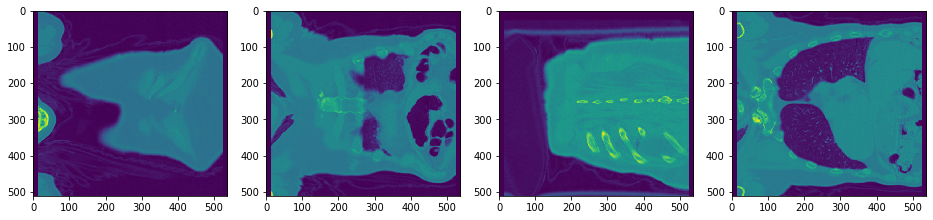

In [31]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(image[:,:,1])

plt.subplot(142)
plt.imshow(image[:,:,20])

plt.subplot(143)
plt.imshow(image[:,:,40])

plt.subplot(144)
plt.imshow(image[:,:,60])

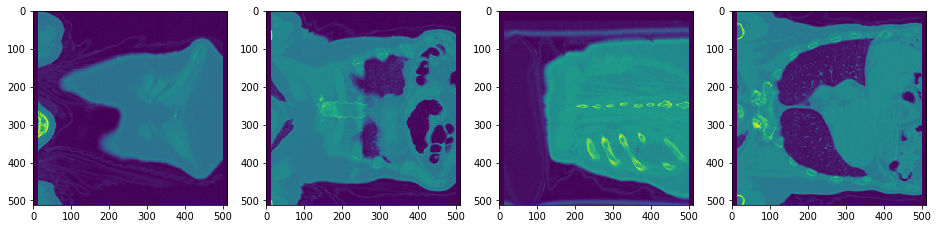

In [32]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(newimage[:,:,1])

plt.subplot(142)
plt.imshow(newimage[:,:,20])

plt.subplot(143)
plt.imshow(newimage[:,:,40])

plt.subplot(144)
plt.imshow(newimage[:,:,60])

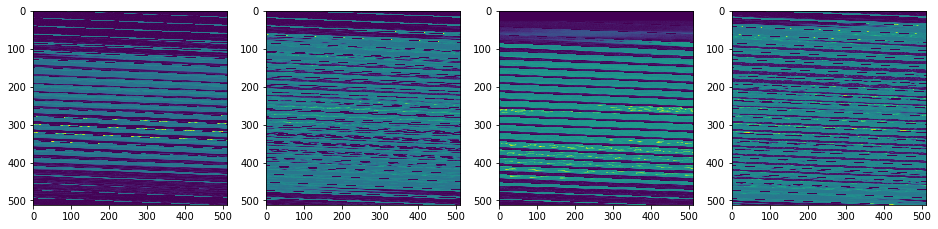

In [40]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(npimage[:,:,1])

plt.subplot(142)
plt.imshow(npimage[:,:,20])

plt.subplot(143)
plt.imshow(npimage[:,:,40])

plt.subplot(144)
plt.imshow(npimage[:,:,60])

In [16]:
import torchvision.transforms as transforms

In [17]:
transforms.Resize()

torchvision.transforms.transforms.Resize

In [9]:
test_df = pd.read_csv("cam_subset_test.csv")
for name in test_df.name.values:
    
    nifti_file = os.path.join("NHSX/nifti/", name + '.nii.gz')
    ctimg = nib.load(nifti_file)
    if (ctimg.get_fdata().shape[0] != 512) or (ctimg.get_fdata().shape[1] != 512):
        print(name, ctimg.get_fdata().shape)

In [10]:
for name in tqdm(test_df.name.values):
    
    nifti_file = os.path.join("NHSX/nifti/", name + '.nii.gz')
    shutil.copyfile(nifti_file, os.path.join("NHSX/nifti_subset", name + '.nii.gz'))

100%|██████████| 80/80 [01:59<00:00,  1.62s/it]


In [9]:
nifti_file = os.path.join("NHSX/nifti/", name + '.nii.gz')
ctimg = nib.load(nifti_file)


In [11]:
ctimg.get_fdata().shape

(512, 512, 390)

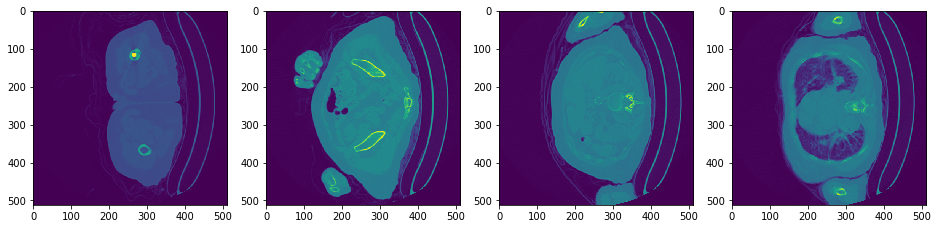

In [10]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(ctimg.get_fdata()[:,:,1])

plt.subplot(142)
plt.imshow(ctimg.get_fdata()[:,:,100])

plt.subplot(143)
plt.imshow(ctimg.get_fdata()[:,:,200])

plt.subplot(144)
plt.imshow(ctimg.get_fdata()[:,:,300])